# Predictability of the Progress of a Pandemic

Philip Murphy, Jill Falman, Pranjali Rai, Val Chang, Victor Cannestro, Joey Martin, Elaine Faustman

Find us at https://github.com/waterhackweek/whw2020_covidcrew

## Outline

### Background - 4 minutes
### Climate Data - 3 minutes 
### Socioeconomic Status - 2 minutes 
### Wastewater Data - 4 minutes
### Linear Regression Example - 3 minutes
### Predictability and Applied Machine Learning - 3 minutes

## Background

### The Problem

Severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) is the etiologic agent of the ongoing COVID-19 pandemic. To date, there have been over 26 million cases of COVID-19 diagenosed in 188 countries and over 850,000 global deaths (Johns Hopkins University and Medicine 2020). Infection with the SARS-CoV-2 virus is accompanied by the shedding of the virus in stool. Therefore, detection of the virus in wastewater is an opportunity to monitor the prevalence and incidence of infections among the population via wastewater-based surveillance (also referred to as wastewater-based epidemiology). Wastewater-based surveillance complements clinical surveillance by capturing important information about a community's health. Disadvantages from clinical detection of COVID-19 include limited diagnostic testing capacity, changing clinical criteria for testing eligibility, asymptomatic infections, and the existence of populations without access to and who do not seek health care. This results in significant uncertainty in the estimated extent of SARS-CoV-2 infection. Wastewater-based surveillance can be used as a proactive approach to outbreak monitoring since the viral RNA of SARS-CoV-2 appears to shed early in the clinical course in stool (Wölfel et al. 2020). The presence of SARS-CoV-2 RNA in stool presents an opportunity to survey wastewater for viral RNA to inform epidemiological monitoring of COVID-19.

### The Data Science Problem

Data from researchers that sample wastewater for viral RNA detection of SARS-CoV-2 are not often readily available. During the COVID-19 pandemic, researchers have been using the free online archvive and distribution service, medRxiv (https://www.medrxiv.org/), to share preprints of manuscripts. Data from the research are commonly presented in figures and raw data are not typically made available. Analyses of these data are static and therefore developing a monitoring and prediction tool for SARS-CoV-2 detection and COVID-19 cases, respectively, is challenging.

### Objectives

* Demonstrate how data on SARS-CoV-2 RNA in wastewater can be useful as an indicator of COVID-19 cases in communities served by a major wastewater treatment plant in Massachusetts.
* Develop a predictive model for using data on SARS-CoV-2 detection in wastewater, COVID-19 cases and mortality, climate (i.e. precipitation and temperature), and socioeconomic status by neighborhoods from January - August 2020.
* Evaluate for correlations between COVID-19 cases and: seasonal changes; dilution factors from heavy rainfall/snow events; socioeconomic factors.


<img src = "MWRA_aerial_view_of_DITP.jpg">

### Catchment Area for Deer Island Wastewater Treatment Plant

Pranjali

In [1]:
import geopandas as gp
import shapely 
import matplotlib.pyplot as plt
import contextily as cx

In [2]:
# Open catchment shapefile
c_area = gp.read_file("/home/jovyan/data/whw2020_covidcrew/data/Deer_Island_catchment_full/Deer_Island_Catchment_full.shp")
c_area.head(5)

,TOWN_ID,TOWN,FIPS_STCO,POP1980,POP1990,POP2000,POP2010,POPCH80_90,POPCH90_00,POPCH00_10,FOURCOLOR,TYPE,ISLAND,SHAPE_AREA,SHAPE_LEN,geometry
0,342,WILMINGTON,25017,17442,17651,21367,22325,209,3716,958,2,T,0,4.442178e+07,31369.102940,"POLYGON ((227497.924 927551.501, 227579.844 92..."
1,48,BURLINGTON,25017,22959,23302,22876,24498,343,-426,1622,4,T,0,3.071246e+07,23368.211376,"POLYGON ((227111.794 918384.061, 227232.224 91..."
2,305,WAKEFIELD,25017,25112,24825,24804,24932,-287,-21,128,2,T,0,2.066149e+07,21647.170934,"POLYGON ((234897.734 920144.061, 235530.574 91..."
3,73,DEDHAM,25021,24399,23782,23464,24729,-617,-318,1265,3,T,0,2.765179e+07,26563.272465,"POLYGON ((225723.704 892264.691, 225741.074 89..."
4,189,MILTON,25021,25696,25725,26062,27003,29,337,941,2,T,0,3.418377e+07,33001.366045,"POLYGON ((235895.594 891221.311, 235902.254 89..."


In [3]:
# open Deer Island WTP location shapefile
di_wtp = gp.read_file("/home/jovyan/data/whw2020_covidcrew/data/Deer_Island_WTP/mwra_deer_island_WTP.shp")
di_wtp

,SOURCE_ID,EPA_SYSTEM,REGISTRY_I,STATUTE,CWP_NAME,CWP_STREET,CWP_CITY,CWP_STATE,CWP_STATE_,CWP_ZIP,...,FAC_TRI_RE,CWP_CURR_3,CWP_13QTRS,SIC_CODES,NAICS_CODE,CASE_IDS,STATE_WATE,STATE_WA_1,OBJECTID,geometry
0,MA0103284,ICP,110025247720,CWA,MWRA DEER ISLAND TREATMENT PLANT,190 TAFTS AVE,BOSTON,MA,None,02152,...,None,Yes,___VVVVVVVVSV,4952,None,None,01090001,ATLANTIC OCEAN (BOSTON HARBOR),169799,POINT (-7898885.197 5213627.803)


In [4]:
print(c_area.crs)
print(di_wtp.crs)
di_wtp_c_area_crs = di_wtp.to_crs(epsg=26986)
print(di_wtp_c_area_crs.crs)

epsg:26986
epsg:3857
epsg:26986


In [5]:
# point layer for labels
## find centroids for catchment area towns
c_area["center"] = c_area["geometry"].centroid
c_area_points = c_area.copy()
c_area_points.set_geometry("center", inplace = True)

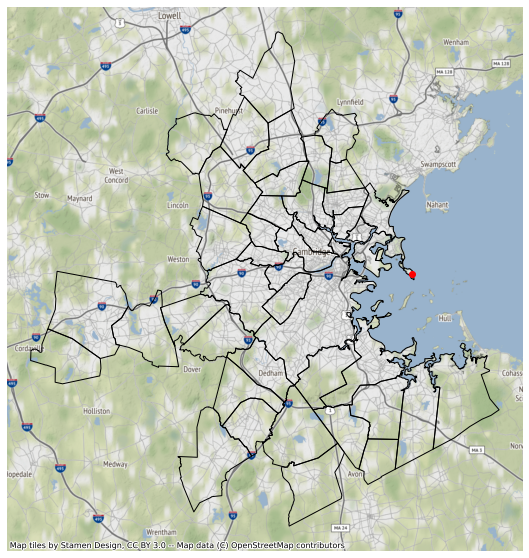

In [6]:
# plot the catchment area map with labels
ax = c_area.to_crs(epsg=3857).plot(facecolor="none", edgecolor='black', figsize=(10,10))
di_wtp_c_area_crs.to_crs(epsg=3857).plot(ax = ax, color='red')
cx.add_basemap(ax)
ax.set_axis_off()

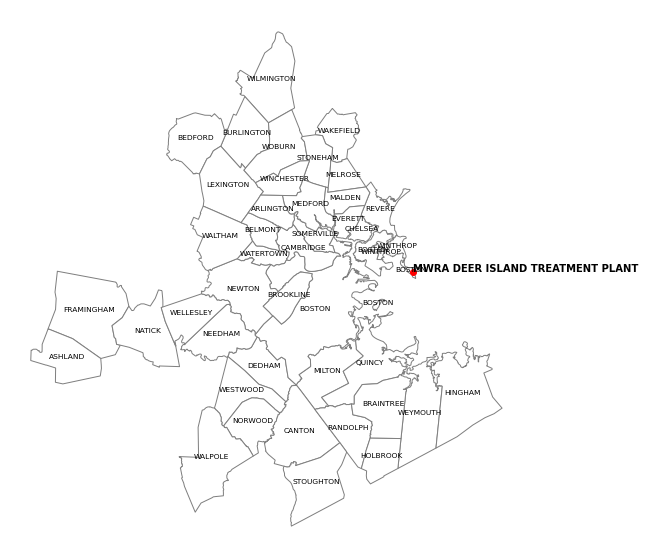

In [7]:
## add labels for cities and towns to the map
ax = c_area.plot(color='white', edgecolor='grey', figsize=(10,10))
di_wtp_c_area_crs.plot(ax = ax, color='red')
ax.set_axis_off()
texts = []
for x, y, label in zip(c_area_points.geometry.x, c_area_points.geometry.y, c_area_points["TOWN"]):
    texts.append(plt.text(x, y, label, fontsize = 7.5, horizontalalignment='center'))
textsdi = []
for x, y, label in zip(di_wtp_c_area_crs.geometry.x, di_wtp_c_area_crs.geometry.y, di_wtp_c_area_crs["CWP_NAME"]):
    textsdi.append(plt.text(x, y, label, fontsize = 10, weight='bold', horizontalalignment='left'))
plt.show()

In [8]:
# north and south catchment area
## add north and south catchment area
n_c_area = gp.read_file("/home/jovyan/data/whw2020_covidcrew/data/other_catch/DI_catchment_north_dis.shp")
s_c_area = gp.read_file("/home/jovyan/data/whw2020_covidcrew/data/other_catch/DI_catchment_south_dis.shp")

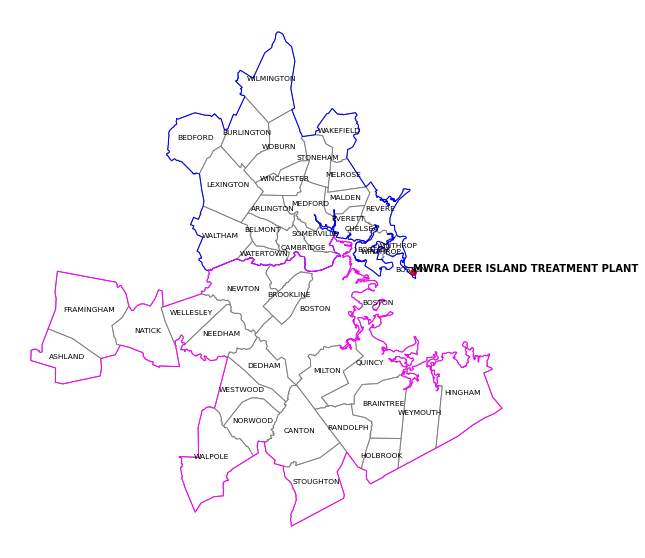

In [9]:
## plot north and south catchment on catchment area with DI WTP location:
ax = c_area.plot(color='white', edgecolor='grey', figsize=(10,10))
di_wtp_c_area_crs.plot(ax = ax, color='red')
n_c_area.plot(ax=ax, facecolor="none",  edgecolor = 'blue')
s_c_area.plot(ax=ax, facecolor="none", edgecolor = 'magenta')
ax.set_axis_off()
texts = []
for x, y, label in zip(c_area_points.geometry.x, c_area_points.geometry.y, c_area_points["TOWN"]):
    texts.append(plt.text(x, y, label, fontsize = 7.5, horizontalalignment='center'))
textsdi = []
for x, y, label in zip(di_wtp_c_area_crs.geometry.x, di_wtp_c_area_crs.geometry.y, di_wtp_c_area_crs["CWP_NAME"]):
    textsdi.append(plt.text(x, y, label, fontsize = 10, weight='bold', horizontalalignment='left'))
plt.show()

## Physical and Economic Geography

### Boston Regional Climate Data

In [10]:
import pandas as pd
import matplotlib as plt

In [11]:
# load station ID and location data
Stn_data = pd.read_csv("/home/jovyan/data/whw2020_covidcrew/data/clim_data/ghcnd-stations_noaa.csv", sep=',', header=None)
Stn_data.columns = ["STN_ID", "LAT", "LONG", "ELEV", "STATE", "NAME"]
Stn_data

,STN_ID,LAT,LONG,ELEV,STATE,NAME
0,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD
1,ACW00011647,17.1333,-61.7833,19.2,NaN,ST JOHNS
2,AE000041196,25.3330,55.5170,34.0,NaN,SHARJAH INTER. AIRP
3,AEM00041194,25.2550,55.3640,10.4,NaN,DUBAI INTL
4,AEM00041217,24.4330,54.6510,26.8,NaN,ABU DHABI INTL
...,...,...,...,...,...,...
115077,ZI000067969,-21.0500,29.3670,861.0,NaN,WEST NICHOLSON
115078,ZI000067975,-20.0670,30.8670,1095.0,NaN,MASVINGO
115079,ZI000067977,-21.0170,31.5830,430.0,NaN,BUFFALO RANGE
115080,ZI000067983,-20.2000,32.6160,1132.0,NaN,CHIPINGE


In [12]:
# Select all stations in the state MA
Stn_data_MA = Stn_data[Stn_data['STATE'] == 'MA']
Stn_data_MA

,STN_ID,LAT,LONG,ELEV,STATE,NAME
67648,US1MABA0001,41.6818,-70.2048,12.5,MA,YARMOUTH 2.3 SSE
67649,US1MABA0002,41.5871,-70.6321,18.3,MA,FALMOUTH 3.1 NNW
67650,US1MABA0003,41.5531,-70.5504,2.4,MA,FALMOUTH 3.0 E
67651,US1MABA0004,41.7135,-70.4723,50.0,MA,SANDWICH 3.4 SSE
67652,US1MABA0007,41.9260,-69.9764,22.3,MA,WELLFLEET 3.0 E
...,...,...,...,...,...,...
114221,USW00094720,41.6686,-70.2800,16.8,MA,HYANNIS BARNSTABLE MUNI AP
114222,USW00094723,42.7172,-71.1239,45.4,MA,LAWRENCE MUNI AP
114223,USW00094724,41.3931,-70.6150,20.7,MA,VINEYARD HAVEN AP
114225,USW00094726,41.6764,-70.9583,24.4,MA,NEW BEDFORD MUNI AP


In [13]:
# export MA station data as csv file
#Stn_data_MA.to_csv("../data/NOAA_orignal_data/ghcnd-stations_noaa_MA.csv",index=False, header =True, sep=',')

**Data processing in ArcGIS**

The "ghcnd-stations_noaa_MA.csv" was imported in ArcGIS Pro. A point shape file was created using "XY to points" tool. The point shapefile was then clipped using the north and south catchment area polygons (dissolved). This catchment area polygon shapefile was then spatial joined to the clipped station shapefile. The table of the output file was then exported for further use in this notebook in the following steps.

**Join Boston regional dail temperature data and station data**

In [14]:
# Load station data from GIS processing
carea_Stn_data = pd.read_csv("/home/jovyan/data/whw2020_covidcrew/data/clim_data/MA_Stn_points_catchment.csv", sep=',')
carea_Stn_data

,STN_ID,LAT,LONG,ELEV,STATE,NAME,Loc
0,US1MAMD0006,42.4318,-71.1716,88.4,MA,ARLINGTON 1.0 NNW,NORTH
1,US1MAMD0007,42.4459,-71.1358,13.7,MA,WINCHESTER 0.7 SE,NORTH
2,US1MAMD0008,42.4424,-71.0529,36.3,MA,MELROSE 0.9 SSE,NORTH
3,US1MAMD0011,42.3876,-71.1253,14.6,MA,CAMBRIDGE 0.9 NNW,NORTH
4,US1MAMD0018,42.3988,-71.1638,4.3,MA,BELMONT 0.2 ESE,NORTH
...,...,...,...,...,...,...,...
92,USW00014739,42.3606,-71.0106,3.7,MA,BOSTON LOGAN INTL AP,NORTH
93,USW00014753,42.2122,-71.1136,190.5,MA,BLUE HILL,SOUTH
94,USW00014789,42.2667,-71.0333,4.9,MA,SQUANTUM NAS,SOUTH
95,USW00054704,42.1908,-71.1736,15.2,MA,NORWOOD MEM AP,SOUTH


In [15]:
# Load station data from GIS processing
boston_clim_data = pd.read_csv("/home/jovyan/data/whw2020_covidcrew/data/clim_data/Boston_Region_Clim_Data.csv", sep=',')
boston_clim_data

,STATION,NAME,DATE,PRCP,TAVG,TMAX,TMIN
0,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/3/2020,0.00,NaN,NaN,NaN
1,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/4/2020,0.09,NaN,NaN,NaN
2,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/5/2020,0.00,NaN,NaN,NaN
3,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/6/2020,0.00,NaN,NaN,NaN
4,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/7/2020,0.07,NaN,NaN,NaN
...,...,...,...,...,...,...,...
21202,USW00094723,"LAWRENCE MUNICIPAL AIRPORT, MA US",8/26/2020,0.00,NaN,74.0,59.0
21203,USW00094723,"LAWRENCE MUNICIPAL AIRPORT, MA US",8/27/2020,0.14,NaN,67.0,53.0
21204,USW00094723,"LAWRENCE MUNICIPAL AIRPORT, MA US",8/28/2020,0.00,NaN,80.0,58.0
21205,USW00094723,"LAWRENCE MUNICIPAL AIRPORT, MA US",8/29/2020,0.54,NaN,75.0,61.0


In [16]:
# Join station data to daily temperature data
## rename station data column
carea_Stn_data = carea_Stn_data.rename(columns={'STN_ID': 'STATION', 'Loc' : 'LOC'})
carea_Stn_data.columns

Index(['STATION', 'LAT', 'LONG', 'ELEV', 'STATE', 'NAME', 'LOC'], dtype='object')

In [17]:
inner_merge_Stn_clim = pd.merge(boston_clim_data, carea_Stn_data, on='STATION', how='inner')
inner_merge_Stn_clim

,STATION,NAME_x,DATE,PRCP,TAVG,TMAX,TMIN,LAT,LONG,ELEV,STATE,NAME_y,LOC
0,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/3/2020,0.00,NaN,NaN,NaN,42.2433,-70.9548,15.8,MA,WEYMOUTH 2.3 N,SOUTH
1,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/4/2020,0.09,NaN,NaN,NaN,42.2433,-70.9548,15.8,MA,WEYMOUTH 2.3 N,SOUTH
2,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/5/2020,0.00,NaN,NaN,NaN,42.2433,-70.9548,15.8,MA,WEYMOUTH 2.3 N,SOUTH
3,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/6/2020,0.00,NaN,NaN,NaN,42.2433,-70.9548,15.8,MA,WEYMOUTH 2.3 N,SOUTH
4,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/7/2020,0.07,NaN,NaN,NaN,42.2433,-70.9548,15.8,MA,WEYMOUTH 2.3 N,SOUTH
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7062,US1MAMD0152,"MEDFORD 0.6 W, MA US",5/15/2020,0.07,NaN,NaN,NaN,42.4220,-71.1205,6.1,MA,MEDFORD 0.6 W,NORTH
7063,US1MAMD0152,"MEDFORD 0.6 W, MA US",5/16/2020,0.77,NaN,NaN,NaN,42.4220,-71.1205,6.1,MA,MEDFORD 0.6 W,NORTH
7064,US1MAMD0152,"MEDFORD 0.6 W, MA US",5/17/2020,0.00,NaN,NaN,NaN,42.4220,-71.1205,6.1,MA,MEDFORD 0.6 W,NORTH
7065,US1MAMD0152,"MEDFORD 0.6 W, MA US",5/18/2020,0.00,NaN,NaN,NaN,42.4220,-71.1205,6.1,MA,MEDFORD 0.6 W,NORTH


In [18]:
# Add a new column with Date in date-time format
inner_merge_Stn_clim['DATE_CONV'] = pd.to_datetime(inner_merge_Stn_clim['DATE'], infer_datetime_format=True)
inner_merge_Stn_clim

,STATION,NAME_x,DATE,PRCP,TAVG,TMAX,TMIN,LAT,LONG,ELEV,STATE,NAME_y,LOC,DATE_CONV
0,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/3/2020,0.00,NaN,NaN,NaN,42.2433,-70.9548,15.8,MA,WEYMOUTH 2.3 N,SOUTH,2020-03-03
1,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/4/2020,0.09,NaN,NaN,NaN,42.2433,-70.9548,15.8,MA,WEYMOUTH 2.3 N,SOUTH,2020-03-04
2,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/5/2020,0.00,NaN,NaN,NaN,42.2433,-70.9548,15.8,MA,WEYMOUTH 2.3 N,SOUTH,2020-03-05
3,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/6/2020,0.00,NaN,NaN,NaN,42.2433,-70.9548,15.8,MA,WEYMOUTH 2.3 N,SOUTH,2020-03-06
4,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/7/2020,0.07,NaN,NaN,NaN,42.2433,-70.9548,15.8,MA,WEYMOUTH 2.3 N,SOUTH,2020-03-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7062,US1MAMD0152,"MEDFORD 0.6 W, MA US",5/15/2020,0.07,NaN,NaN,NaN,42.4220,-71.1205,6.1,MA,MEDFORD 0.6 W,NORTH,2020-05-15
7063,US1MAMD0152,"MEDFORD 0.6 W, MA US",5/16/2020,0.77,NaN,NaN,NaN,42.4220,-71.1205,6.1,MA,MEDFORD 0.6 W,NORTH,2020-05-16
7064,US1MAMD0152,"MEDFORD 0.6 W, MA US",5/17/2020,0.00,NaN,NaN,NaN,42.4220,-71.1205,6.1,MA,MEDFORD 0.6 W,NORTH,2020-05-17
7065,US1MAMD0152,"MEDFORD 0.6 W, MA US",5/18/2020,0.00,NaN,NaN,NaN,42.4220,-71.1205,6.1,MA,MEDFORD 0.6 W,NORTH,2020-05-18


In [19]:
# Separate data for north and south catchment area
## extract north catchment area data
c_area_clim_north = inner_merge_Stn_clim.loc[inner_merge_Stn_clim['LOC'] == 'NORTH']
c_area_clim_north

,STATION,NAME_x,DATE,PRCP,TAVG,TMAX,TMIN,LAT,LONG,ELEV,STATE,NAME_y,LOC,DATE_CONV
207,US1MAMD0018,"BELMONT 0.2 ESE, MA US",3/28/2020,0.00,NaN,NaN,NaN,42.3988,-71.1638,4.3,MA,BELMONT 0.2 ESE,NORTH,2020-03-28
208,US1MAMD0018,"BELMONT 0.2 ESE, MA US",3/29/2020,0.29,NaN,NaN,NaN,42.3988,-71.1638,4.3,MA,BELMONT 0.2 ESE,NORTH,2020-03-29
209,US1MAMD0018,"BELMONT 0.2 ESE, MA US",3/30/2020,0.57,NaN,NaN,NaN,42.3988,-71.1638,4.3,MA,BELMONT 0.2 ESE,NORTH,2020-03-30
210,US1MAMD0018,"BELMONT 0.2 ESE, MA US",3/31/2020,0.17,NaN,NaN,NaN,42.3988,-71.1638,4.3,MA,BELMONT 0.2 ESE,NORTH,2020-03-31
211,US1MAMD0018,"BELMONT 0.2 ESE, MA US",4/1/2020,0.00,NaN,NaN,NaN,42.3988,-71.1638,4.3,MA,BELMONT 0.2 ESE,NORTH,2020-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7062,US1MAMD0152,"MEDFORD 0.6 W, MA US",5/15/2020,0.07,NaN,NaN,NaN,42.4220,-71.1205,6.1,MA,MEDFORD 0.6 W,NORTH,2020-05-15
7063,US1MAMD0152,"MEDFORD 0.6 W, MA US",5/16/2020,0.77,NaN,NaN,NaN,42.4220,-71.1205,6.1,MA,MEDFORD 0.6 W,NORTH,2020-05-16
7064,US1MAMD0152,"MEDFORD 0.6 W, MA US",5/17/2020,0.00,NaN,NaN,NaN,42.4220,-71.1205,6.1,MA,MEDFORD 0.6 W,NORTH,2020-05-17
7065,US1MAMD0152,"MEDFORD 0.6 W, MA US",5/18/2020,0.00,NaN,NaN,NaN,42.4220,-71.1205,6.1,MA,MEDFORD 0.6 W,NORTH,2020-05-18


In [20]:
## extract south catchment area data
c_area_clim_south = inner_merge_Stn_clim.loc[inner_merge_Stn_clim['LOC'] == 'SOUTH']
c_area_clim_south

,STATION,NAME_x,DATE,PRCP,TAVG,TMAX,TMIN,LAT,LONG,ELEV,STATE,NAME_y,LOC,DATE_CONV
0,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/3/2020,0.00,NaN,NaN,NaN,42.2433,-70.9548,15.8,MA,WEYMOUTH 2.3 N,SOUTH,2020-03-03
1,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/4/2020,0.09,NaN,NaN,NaN,42.2433,-70.9548,15.8,MA,WEYMOUTH 2.3 N,SOUTH,2020-03-04
2,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/5/2020,0.00,NaN,NaN,NaN,42.2433,-70.9548,15.8,MA,WEYMOUTH 2.3 N,SOUTH,2020-03-05
3,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/6/2020,0.00,NaN,NaN,NaN,42.2433,-70.9548,15.8,MA,WEYMOUTH 2.3 N,SOUTH,2020-03-06
4,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/7/2020,0.07,NaN,NaN,NaN,42.2433,-70.9548,15.8,MA,WEYMOUTH 2.3 N,SOUTH,2020-03-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6692,USW00014753,"BLUE HILL LCD, MA US",6/26/2020,0.02,NaN,83.0,65.0,42.2122,-71.1136,190.5,MA,BLUE HILL,SOUTH,2020-06-26
6693,USW00014753,"BLUE HILL LCD, MA US",6/27/2020,0.05,NaN,82.0,65.0,42.2122,-71.1136,190.5,MA,BLUE HILL,SOUTH,2020-06-27
6694,USW00014753,"BLUE HILL LCD, MA US",6/28/2020,3.27,NaN,84.0,62.0,42.2122,-71.1136,190.5,MA,BLUE HILL,SOUTH,2020-06-28
6695,USW00014753,"BLUE HILL LCD, MA US",6/29/2020,1.46,NaN,71.0,61.0,42.2122,-71.1136,190.5,MA,BLUE HILL,SOUTH,2020-06-29


In [21]:
# Group by DATE_CONV and calculate mean precipitation
## north catchment area daily mean data
c_area_clim_north_dmean = c_area_clim_north.groupby(['DATE_CONV'])[['PRCP','TMAX', 'TMIN']].mean()
c_area_clim_north_dmean

,PRCP,TMAX,TMIN
DATE_CONV,,,
2020-01-01,0.018125,41.0,34.0
2020-01-02,0.000000,47.5,31.5
2020-01-03,0.000000,50.0,40.0
2020-01-04,0.014667,45.5,38.5
2020-01-05,0.230000,39.5,27.5
...,...,...,...
2020-08-28,0.151333,82.5,60.0
2020-08-29,0.029333,77.0,62.0
2020-08-30,0.258750,77.0,57.0


In [22]:
### Calculate daily average temperature from TMIN and TMAX
c_area_clim_north_dmean['TAVG_cal'] = c_area_clim_north_dmean[['TMAX', 'TMIN']].mean(axis=1)
c_area_clim_north_dmean

,PRCP,TMAX,TMIN,TAVG_cal
DATE_CONV,,,,
2020-01-01,0.018125,41.0,34.0,37.50
2020-01-02,0.000000,47.5,31.5,39.50
2020-01-03,0.000000,50.0,40.0,45.00
2020-01-04,0.014667,45.5,38.5,42.00
2020-01-05,0.230000,39.5,27.5,33.50
...,...,...,...,...
2020-08-28,0.151333,82.5,60.0,71.25
2020-08-29,0.029333,77.0,62.0,69.50
2020-08-30,0.258750,77.0,57.0,67.00


In [23]:
# Group by DATE_CONV and calculate mean precipitation
## south catchment area daily mean data
c_area_clim_south_dmean = c_area_clim_south.groupby(['DATE_CONV'])[['PRCP','TMAX', 'TMIN']].mean()
c_area_clim_south_dmean

,PRCP,TMAX,TMIN
DATE_CONV,,,
2020-01-01,0.013077,40.500000,31.333333
2020-01-02,0.000000,44.833333,28.500000
2020-01-03,0.000000,48.000000,36.166667
2020-01-04,0.036923,46.833333,40.333333
2020-01-05,0.268462,42.166667,29.833333
...,...,...,...
2020-08-28,0.285833,76.400000,59.800000
2020-08-29,0.025000,78.800000,61.000000
2020-08-30,0.133846,77.400000,59.200000


In [24]:
### Calculate daily average temperature from TMIN and TMAX
c_area_clim_south_dmean['TAVG_cal'] = c_area_clim_south_dmean[['TMAX', 'TMIN']].mean(axis=1)
c_area_clim_south_dmean

,PRCP,TMAX,TMIN,TAVG_cal
DATE_CONV,,,,
2020-01-01,0.013077,40.500000,31.333333,35.916667
2020-01-02,0.000000,44.833333,28.500000,36.666667
2020-01-03,0.000000,48.000000,36.166667,42.083333
2020-01-04,0.036923,46.833333,40.333333,43.583333
2020-01-05,0.268462,42.166667,29.833333,36.000000
...,...,...,...,...
2020-08-28,0.285833,76.400000,59.800000,68.100000
2020-08-29,0.025000,78.800000,61.000000,69.900000
2020-08-30,0.133846,77.400000,59.200000,68.300000


In [25]:
#export data
#c_area_clim_south_dmean.to_csv("../data/final_south_daily_mean_noaa.csv",index=True, header =True, sep=',')
#c_area_clim_north_dmean.to_csv("../data/final_north_daily_mean_noaa.csv",index=True, header =True, sep=',')

<AxesSubplot:xlabel='DATE_CONV'>

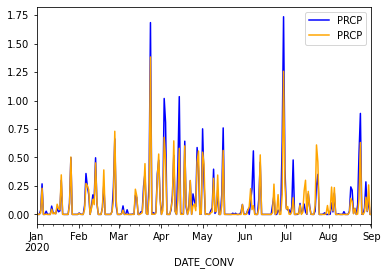

In [26]:
# ploting precipitation for north and south catchment area 
ax = c_area_clim_south_dmean.plot(y='PRCP', color = 'blue')
c_area_clim_north_dmean.plot(ax=ax, color = 'orange', y='PRCP')


<AxesSubplot:xlabel='DATE_CONV'>

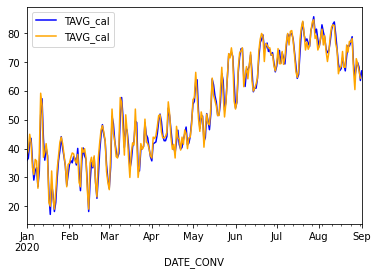

In [27]:
# ploting calculated average temperature for north and south catchment area
ax = c_area_clim_south_dmean.plot(y='TAVG_cal', color = 'blue')
c_area_clim_north_dmean.plot(ax=ax, color = 'orange', y='TAVG_cal')

### Socioeconomic Status

Val

helpful documentation: https://jtleider.github.io/censusdata/

In [28]:
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
import scipy.stats as st
from scipy.io import loadmat
import statistics as stats
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d
import math

import pandas as pd
import scipy.io as sio
import scipy.stats as st


### 1. Install CensusData Package

In [29]:
# will need to install every few hours, consider making a covidcrew env. to keep installed packages
!pip install CensusData

In [30]:
# We also need to import these two

import pandas as pd
import censusdata

### 2. Determine the data you want:

### To find the code for the marker you're interested, download and look at the excel sheet 'table shells' at https://www.census.gov/programs-surveys/acs/technical-documentation/summary-file-documentation.html

In [32]:
# here's what that table shells sheet looks like
table_shells = pd.read_excel('notebooks/ACS2018_Table_Shells.xlsx')
table_shells[:10]

,Table ID,Line,UniqueID,Stub,Data Release
0,,NaN,NaN,NaN,NaN
1,B00001,NaN,NaN,UNWEIGHTED SAMPLE COUNT OF THE POPULATION,"1,5"
2,B00001,NaN,NaN,Universe: Total population,NaN
3,B00001,1,B00001_001,Total,NaN
4,NaN,,NaN,NaN,NaN
5,B00002,,NaN,UNWEIGHTED SAMPLE HOUSING UNITS,"1,5"
6,B00002,,NaN,Universe: Housing units,NaN
7,B00002,1,B00002_001,Total,NaN
8,NaN,,NaN,,NaN
9,B01001,,NaN,SEX BY AGE,"1,5"


In [33]:
markers_codes = ['B01001_001E', 'B01002_001E', 'B19013_001E', 'B02001_002E','B02001_003E','B02001_004E','B02001_005E','B02001_006E', 'B02001_007E','B02001_008E']

In [34]:
markers = ['population size', 'medium age', 'medium household income', 'White alone', 'Black or African American alone','American Indian and Alaska Native alone',
'Asian alone', 'Native Hawaiian and Other Pacific Islander alone','Some other race alone','Two or more races']


### 3. Determine the geographies you want

In [35]:
# find the state code for MA
censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs5', 2015)

{'Alabama': censusgeo((('state', '01'),)),
 'Alaska': censusgeo((('state', '02'),)),
 'Arizona': censusgeo((('state', '04'),)),
 'Arkansas': censusgeo((('state', '05'),)),
 'California': censusgeo((('state', '06'),)),
 'Colorado': censusgeo((('state', '08'),)),
 'Connecticut': censusgeo((('state', '09'),)),
 'Delaware': censusgeo((('state', '10'),)),
 'District of Columbia': censusgeo((('state', '11'),)),
 'Florida': censusgeo((('state', '12'),)),
 'Georgia': censusgeo((('state', '13'),)),
 'Hawaii': censusgeo((('state', '15'),)),
 'Idaho': censusgeo((('state', '16'),)),
 'Illinois': censusgeo((('state', '17'),)),
 'Indiana': censusgeo((('state', '18'),)),
 'Iowa': censusgeo((('state', '19'),)),
 'Kansas': censusgeo((('state', '20'),)),
 'Kentucky': censusgeo((('state', '21'),)),
 'Louisiana': censusgeo((('state', '22'),)),
 'Maine': censusgeo((('state', '23'),)),
 'Maryland': censusgeo((('state', '24'),)),
 'Massachusetts': censusgeo((('state', '25'),)),
 'Michigan': censusgeo((('stat

### MA state code: 'Massachusetts': ('state', '25')

In [36]:
# find the city code for counties in MA
censusdata.geographies(censusdata.censusgeo([('state','25'),('county', '*')]), 'acs5', 2015)

{'Barnstable County, Massachusetts': censusgeo((('state', '25'), ('county', '001'))),
 'Berkshire County, Massachusetts': censusgeo((('state', '25'), ('county', '003'))),
 'Bristol County, Massachusetts': censusgeo((('state', '25'), ('county', '005'))),
 'Dukes County, Massachusetts': censusgeo((('state', '25'), ('county', '007'))),
 'Essex County, Massachusetts': censusgeo((('state', '25'), ('county', '009'))),
 'Franklin County, Massachusetts': censusgeo((('state', '25'), ('county', '011'))),
 'Hampden County, Massachusetts': censusgeo((('state', '25'), ('county', '013'))),
 'Hampshire County, Massachusetts': censusgeo((('state', '25'), ('county', '015'))),
 'Middlesex County, Massachusetts': censusgeo((('state', '25'), ('county', '017'))),
 'Nantucket County, Massachusetts': censusgeo((('state', '25'), ('county', '019'))),
 'Norfolk County, Massachusetts': censusgeo((('state', '25'), ('county', '021'))),
 'Plymouth County, Massachusetts': censusgeo((('state', '25'), ('county', '023'

We're interested in Norfolk (021), Suffolk (025), and Middlesex (017)

### 4. Download data you want

### You can download data for the state of MA by county name 

In [37]:
# for Norfolk, county code = 021
acs_norfolk = censusdata.download('acs5', 2015,censusdata.censusgeo([('state', '25'), ('county','021')]), markers_codes)
acs_norfolk.columns=markers
acs_norfolk

,population size,medium age,medium household income,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races
"Norfolk County, Massachusetts: Summary level: 050, state:25> county:021",687721,40.9,88262,555100,43069,564,66682,35,8096,14175


In [38]:
# I'm still learning to code so let's do this to work with the data easier:
data_norfolk = np.array([687721, 40.9 ,88262 ,555100 ,43069 ,564 ,66682 ,35 ,8096 ,14175])
data_norfolk

array([6.87721e+05, 4.09000e+01, 8.82620e+04, 5.55100e+05, 4.30690e+04,
       5.64000e+02, 6.66820e+04, 3.50000e+01, 8.09600e+03, 1.41750e+04])

In [39]:
# for Suffolk, county code = 025
acs_suffolk = censusdata.download('acs5', 2015,censusdata.censusgeo([('state', '25'), ('county','025')]), markers_codes)
acs_suffolk.columns=markers
acs_suffolk

,population size,medium age,medium household income,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races
"Suffolk County, Massachusetts: Summary level: 050, state:25> county:025",758919,32.2,55044,421489,169946,2593,65396,107,56190,43198


In [40]:
# I'm still learning to code so let's do this to work with the data easier:
data_suffolk = np.array([758919 ,32.2 ,55044 ,421489 ,169946 ,2593 ,65396 ,107 ,56190 ,43198])
data_suffolk

array([7.58919e+05, 3.22000e+01, 5.50440e+04, 4.21489e+05, 1.69946e+05,
       2.59300e+03, 6.53960e+04, 1.07000e+02, 5.61900e+04, 4.31980e+04])

In [41]:
# for Middlesex, county code = 017
acs_middlesex = censusdata.download('acs5', 2015,censusdata.censusgeo([('state', '25'), ('county','017')]), markers_codes)
acs_middlesex.columns=markers
acs_middlesex

,population size,medium age,medium household income,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races
"Middlesex County, Massachusetts: Summary level: 050, state:25> county:017",1556116,38.5,85118,1230158,75980,2074,163386,424,37162,46932


In [42]:
# I'm still learning to code so let's do this to work with the data easier:
data_middlesex = np.array([1556116 ,38.5, 85118 ,1230158 ,75980 ,2074 ,163386 ,424 ,37162 ,46932])
data_middlesex

array([1.556116e+06, 3.850000e+01, 8.511800e+04, 1.230158e+06,
       7.598000e+04, 2.074000e+03, 1.633860e+05, 4.240000e+02,
       3.716200e+04, 4.693200e+04])

### Make a table with the values you want

In [43]:
table_allcounties = pd.DataFrame({"Middlesex": data_middlesex , "Suffolk": data_suffolk, "Norfolk": data_norfolk })
table_allcounties = table_allcounties.T

table_allcounties.columns= markers
table_allcounties

,population size,medium age,medium household income,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races
Middlesex,1556116.0,38.5,85118.0,1230158.0,75980.0,2074.0,163386.0,424.0,37162.0,46932.0
Suffolk,758919.0,32.2,55044.0,421489.0,169946.0,2593.0,65396.0,107.0,56190.0,43198.0
Norfolk,687721.0,40.9,88262.0,555100.0,43069.0,564.0,66682.0,35.0,8096.0,14175.0


### 5. Split counties up into North and South Region

In [44]:
# set percentage weights for each county in each region
# this is approximate, we can adjust with more accurate weights
middlesex_north = 0.8
suffolk_north = 0.5
norfolk_north = 0.3

middlesex_south = 0.2
suffolk_south = 0.5
norfolk_south = 0.7

In [45]:
# create a table for the north region with percentage weights
table_north = pd.DataFrame({"Middlesex": middlesex_north*data_middlesex , "Suffolk": suffolk_north*data_suffolk, "Norfolk": norfolk_north*data_norfolk })
table_north = table_north.T

table_north.columns= markers
table_north

,population size,medium age,medium household income,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races
Middlesex,1244892.8,30.80,68094.4,984126.4,60784.0,1659.2,130708.8,339.2,29729.6,37545.6
Suffolk,379459.5,16.10,27522.0,210744.5,84973.0,1296.5,32698.0,53.5,28095.0,21599.0
Norfolk,206316.3,12.27,26478.6,166530.0,12920.7,169.2,20004.6,10.5,2428.8,4252.5


In [46]:
# let's add up the counties counts so we get a total aggregate table
n = table_north.sum(axis = 0, skipna = True)
north = pd.DataFrame({"north_sum": n})
north = north.T
north

,population size,medium age,medium household income,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races
north_sum,1830668.6,59.17,122095.0,1361400.9,158677.7,3124.9,183411.4,403.2,60253.4,63397.1


In [47]:
# calculate demographic data as percentages of thet total population
a = np.array([north['White alone'],north['Black or African American alone'],north['American Indian and Alaska Native alone'], north['Asian alone'],north['Native Hawaiian and Other Pacific Islander alone'],north['Some other race alone'],north['Two or more races']])
demographic_north = 100*a/np.array([north['population size']])
np.set_printoptions(suppress=True)
print(demographic_north)

[[74.36632168]
 [ 8.66774576]
 [ 0.1706972 ]
 [10.01882045]
 [ 0.02202474]
 [ 3.29133301]
 [ 3.46305716]]


#### This is the demographic data for the North region as defined. If I were more skilled at using Python I could take these numbers and put them into a table and show the markers associated with each percentage but I'm tired :)

### Do the same for the south region

In [48]:
# create a table for the south region with percentage weights
table_south = pd.DataFrame({"Middlesex": middlesex_south*data_middlesex , "Suffolk": suffolk_south*data_suffolk, "Norfolk": norfolk_south*data_norfolk })
table_south = table_south.T

table_south.columns= markers
table_south

,population size,medium age,medium household income,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races
Middlesex,311223.2,7.70,17023.6,246031.6,15196.0,414.8,32677.2,84.8,7432.4,9386.4
Suffolk,379459.5,16.10,27522.0,210744.5,84973.0,1296.5,32698.0,53.5,28095.0,21599.0
Norfolk,481404.7,28.63,61783.4,388570.0,30148.3,394.8,46677.4,24.5,5667.2,9922.5


In [49]:
# let's add up the counties counts so we get a total aggregate table
s = table_south.sum(axis = 0, skipna = True)
south = pd.DataFrame({"south_sum": s})
south = south.T
south

,population size,medium age,medium household income,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races
south_sum,1172087.4,52.43,106329.0,845346.1,130317.3,2106.1,112052.6,162.8,41194.6,40907.9


In [50]:
# calculate demographic data as percentages of thet total population
b = np.array([south['White alone'],south['Black or African American alone'],south['American Indian and Alaska Native alone'], south['Asian alone'],south['Native Hawaiian and Other Pacific Islander alone'],south['Some other race alone'],south['Two or more races']])
demographic_south = 100*b/np.array([south['population size']])
np.set_printoptions(suppress=True)
print(demographic_south)

[[72.12312836]
 [11.11839441]
 [ 0.17968797]
 [ 9.56008912]
 [ 0.01388975]
 [ 3.51463551]
 [ 3.49017488]]


## COVID and Water Water Data

Joey

In [51]:
import pandas as pd
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

First, we load in the sewage surveillance data from the Deer Island plant. It's presented as samples from Northern and Southern catchements (as we have roughly defined above) as well as previous 7 day averages of those catchements.

In [52]:
ss = pd.read_csv("MWRAData20200902-NSdata.csv", header=2)
ss=ss.rename(columns={"(copies/mL)":"Northern", "(copies/mL).1":"Southern", "avg":"North_avg", "avg.1":"South_avg"})
ss['Sample Date']=pd.to_datetime(ss["Sample Date"])

idx = pd.date_range('2020-03-11', '2020-08-30')
ss=ss.set_index('Sample Date')
ss = ss.reindex(idx, fill_value=0)

In [53]:
ss

,Northern,Southern,North_avg,South_avg
2020-03-11,15.0,22.0,18.0,14.0
2020-03-12,NaN,5.0,18.0,13.0
2020-03-13,NaN,12.0,18.0,13.0
2020-03-14,18.0,16.0,18.0,15.0
2020-03-15,21.0,23.0,19.0,14.0
...,...,...,...,...
2020-08-26,0.0,0.0,0.0,0.0
2020-08-27,32.0,50.0,28.0,47.0
2020-08-28,0.0,0.0,0.0,0.0
2020-08-29,0.0,0.0,0.0,0.0


Next is the COVID case data from the New York Times GitHub.  There is likely a more memory efficient way to call this from the NYT repo vice having the csv file here locl directory.

In [54]:
counties=pd.read_csv("us-counties.csv")

counties

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
...,...,...,...,...,...,...
495658,2020-09-02,Sweetwater,Wyoming,56037.0,304,2
495659,2020-09-02,Teton,Wyoming,56039.0,433,1
495660,2020-09-02,Uinta,Wyoming,56041.0,303,2
495661,2020-09-02,Washakie,Wyoming,56043.0,108,6


We have defined the area serviced by the treatment plant as the tri-country area including Norfolk, Suffolk, and Middlesex counties.

In [55]:
tri_counties={'Norfolk', 'Suffolk', 'Middlesex'}

We then slice out the data for the counties we want (remember that the same county exists in multiple states!)

In [56]:
mass_total=pd.DataFrame(counties.where(counties['state']=='Massachusetts').dropna(thresh=2).groupby('date')['cases'].sum())
tricounty_total=pd.DataFrame((counties.where((counties['state']=='Massachusetts') & (counties['county'].isin(tri_counties)))).dropna(thresh=2).groupby('date')['cases'].sum())
death_total=pd.DataFrame((counties.where((counties['state']=='Massachusetts') & (counties['county'].isin(tri_counties)))).dropna(thresh=2).groupby('date')['deaths'].sum())

By overlaying these time series we see evidence of correlation and the potential for a machine learning solution. Note that the sewage samples and deaths are increased by an order of magnitude for better visual appreciation.

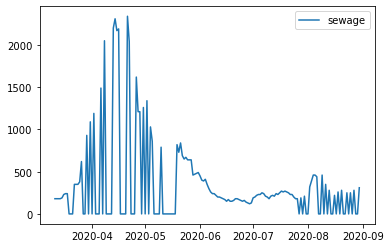

In [57]:
plt.plot(ss['North_avg'].index,(10*ss['North_avg'].interpolate()), label='sewage')
plt.legend()

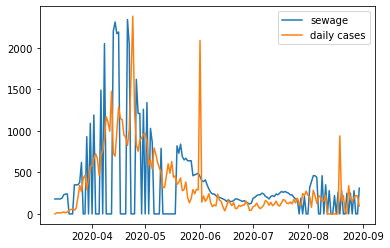

In [58]:
plt.plot(ss['North_avg'].index,(10*ss['North_avg'].interpolate()), label='sewage')
plt.plot(ss['North_avg'].index,tricounty_total.loc['2020-03-11':'2020-08-30'].diff().fillna(0),label='daily cases')
plt.legend()


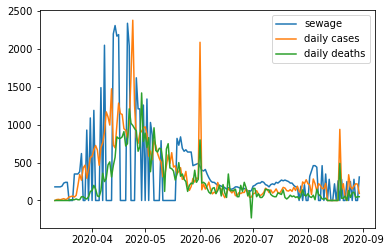

In [59]:
plt.plot(ss['North_avg'].index,(10*ss['North_avg'].interpolate()), label='sewage')
plt.plot(ss['North_avg'].index,tricounty_total.loc['2020-03-11':'2020-08-30'].diff().fillna(0),label='daily cases')
plt.plot(ss['North_avg'].index,(10*death_total.loc['2020-03-11':'2020-08-30'].diff().fillna(0)),label='daily deaths')
plt.legend()

In [60]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
sns.set(font_scale=1.5) 

import numpy as np
import pandas as pd
import os

from bokeh.layouts import column, row
from bokeh.models import Select, Panel, Tabs, Range1d, LinearAxis
from bokeh.plotting import figure, ColumnDataSource
from bokeh.io import show, output_notebook, output_file

output_notebook()

Loading BokehJS ...

In [61]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"

# Read the values, set the indices, parse the dates, and alphabetize
df = pd.read_csv(url, 
                 header=0, 
                 index_col=['state','county','date'], 
                 parse_dates=True).sort_index()

counties = ['Middlesex', 'Norfolk', 'Suffolk']
data = {counties[i] : df.loc[('Massachusetts', counties[i])].drop('fips', axis=1) for i in range(len(counties))}
data

{'Middlesex':             cases  deaths
 date                     
 2020-03-05      1       0
 2020-03-06      1       0
 2020-03-07      5       0
 2020-03-08     10       0
 2020-03-09     15       0
 ...           ...     ...
 2020-08-30  27595    2068
 2020-08-31  27665    2070
 2020-09-01  27732    2071
 2020-09-02  27769    2070
 2020-09-03  25495    2071
 
 [183 rows x 2 columns], 'Norfolk':             cases  deaths
 date                     
 2020-03-02      1       0
 2020-03-03      1       0
 2020-03-04      1       0
 2020-03-05      1       0
 2020-03-06      3       0
 ...           ...     ...
 2020-08-30  11006    1017
 2020-08-31  11033    1018
 2020-09-01  11050    1018
 2020-09-02  11072    1019
 2020-09-03   9597    1021
 
 [186 rows x 2 columns], 'Suffolk':             cases  deaths
 date                     
 2020-02-01      1       0
 2020-02-02      1       0
 2020-02-03      1       0
 2020-02-04      1       0
 2020-02-05      1       0
 ...           ...    

In [62]:
start = data['Suffolk'].index[0]

# Make them all start at same time
for i, county in enumerate(['Middlesex', 'Norfolk']):  
    idx = pd.date_range(start=start, end=data[county].index[0])[:-1]
    cols = data[county].columns
    vals = np.zeros((len(idx), len(cols)))
    pad = pd.DataFrame(data=vals, index=idx, columns=cols)
    data[county] = pd.concat([pad, data[county]])

In [63]:
data

{'Middlesex':               cases  deaths
 2020-02-01      0.0     0.0
 2020-02-02      0.0     0.0
 2020-02-03      0.0     0.0
 2020-02-04      0.0     0.0
 2020-02-05      0.0     0.0
 ...             ...     ...
 2020-08-30  27595.0  2068.0
 2020-08-31  27665.0  2070.0
 2020-09-01  27732.0  2071.0
 2020-09-02  27769.0  2070.0
 2020-09-03  25495.0  2071.0
 
 [216 rows x 2 columns], 'Norfolk':               cases  deaths
 2020-02-01      0.0     0.0
 2020-02-02      0.0     0.0
 2020-02-03      0.0     0.0
 2020-02-04      0.0     0.0
 2020-02-05      0.0     0.0
 ...             ...     ...
 2020-08-30  11006.0  1017.0
 2020-08-31  11033.0  1018.0
 2020-09-01  11050.0  1018.0
 2020-09-02  11072.0  1019.0
 2020-09-03   9597.0  1021.0
 
 [216 rows x 2 columns], 'Suffolk':             cases  deaths
 date                     
 2020-02-01      1       0
 2020-02-02      1       0
 2020-02-03      1       0
 2020-02-04      1       0
 2020-02-05      1       0
 ...           ...     ...
 

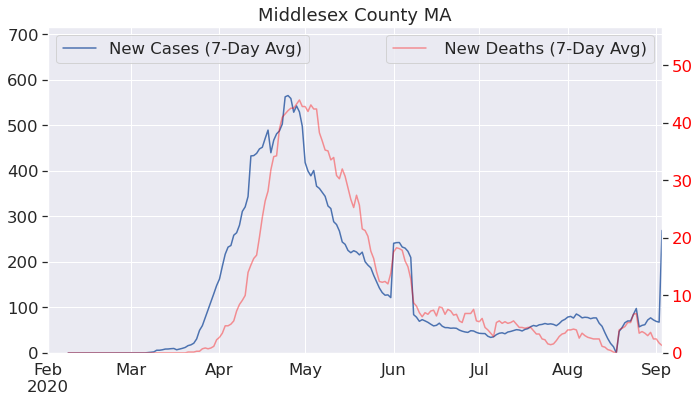

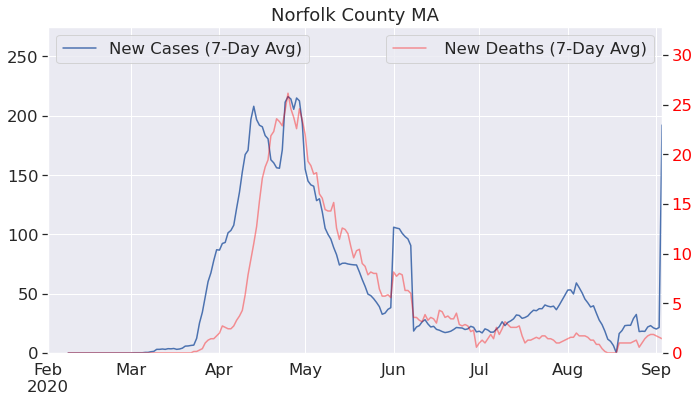

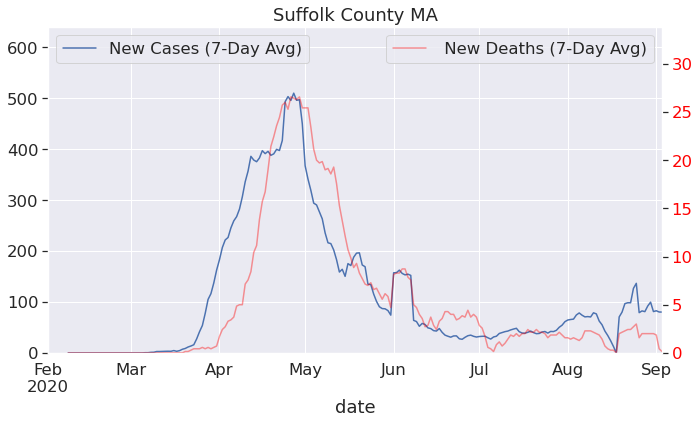

In [64]:
for i, county_df in enumerate(data.values()):    
    changes = county_df.diff().rolling(7).mean()

    fig, ax = plt.subplots()
    ax2 = ax.twinx()

    changes.cases.abs().plot(figsize=(11,6), ax=ax, label='New Cases (7-Day Avg)')
    changes.deaths.abs().plot(figsize=(11,6), color='red', ax=ax2, alpha=0.4, label=' New Deaths (7-Day Avg)')
    ax.set_title(counties[i] +' County MA')

    # Make ax2 tick labels the color of the graph
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_ylim([0,changes.deaths.abs().max() + changes.deaths.abs().std()])
    ax.set_ylim([0,changes.cases.abs().max() + changes.cases.abs().std()])
    ax2.grid(False)

    ax.legend(loc='upper left')
    ax2.legend()
    
plt.show()

In [65]:
# Read the values, set the indices, parse the dates, and alphabetize
sew_df = pd.read_csv('sewage_surveillance.csv',
                     header=0, 
                     index_col=[0], 
                     parse_dates=True).sort_index()

ns = ['Northern', 'North_avg']
ss = ['Southern', 'South_avg']

northern = sew_df[ns].diff().rolling(7).mean().abs()
southern = sew_df[ss].diff().rolling(7).mean().abs()

sew_df.head()

,Northern,Southern,North_avg,South_avg
2020-03-11,15.0,22.0,18.0,14.0
2020-03-12,0.0,5.0,18.0,13.0
2020-03-13,0.0,12.0,18.0,13.0
2020-03-14,18.0,16.0,18.0,15.0
2020-03-15,21.0,23.0,19.0,14.0


In [66]:
changes_Middlesex = data['Middlesex'].diff().rolling(7).mean().abs()
changes_Norfolk = data['Norfolk'].diff().rolling(7).mean().abs()
changes_Suffolk = data['Suffolk'].diff().rolling(7).mean().abs()

# 'Middlesex'
p1 = figure(x_axis_type='datetime', 
            x_axis_label='Date', 
            y_axis_label='Daily Changes',
            y_range=(0, changes_Middlesex.cases.max()))

# Setting the second y axis range name and range
p1.extra_y_ranges = {"New deaths": Range1d(start=0, end=changes_Middlesex.deaths.max())}

# Adding the second axis to the plot.  
p1.add_layout(LinearAxis(y_range_name="New deaths"), 'right')

p1.line(changes_Middlesex.index, changes_Middlesex.cases, color='blue', legend_label='New cases')
p1.line(changes_Middlesex.index, changes_Middlesex.deaths, color='red', y_range_name='New deaths', legend_label='New deaths')

# 'Norfolk'
p2 = figure(x_axis_type='datetime', 
            x_axis_label='Date', 
            y_axis_label='Daily Changes',
            y_range=(0, changes_Norfolk.cases.max()))

# Setting the second y axis range name and range
p2.extra_y_ranges = {"New deaths": Range1d(start=0, end=changes_Norfolk.deaths.max())}

# Adding the second axis to the plot.  
p2.add_layout(LinearAxis(y_range_name="New deaths"), 'right')

p2.line(changes_Norfolk.index, changes_Norfolk.cases, color='blue', legend_label='New cases')
p2.line(changes_Norfolk.index, changes_Norfolk.deaths, color='red', y_range_name='New deaths', legend_label='New deaths')


# 'Suffolk'
p3 = figure(x_axis_type='datetime', 
            x_axis_label='Date', 
            y_axis_label='Daily Changes',
            y_range=(0, changes_Suffolk.cases.max()))

# Setting the second y axis range name and range
p3.extra_y_ranges = {"New deaths": Range1d(start=0, end=changes_Suffolk.deaths.max())}

# Adding the second axis to the plot.  
p3.add_layout(LinearAxis(y_range_name="New deaths"), 'right')

p3.line(changes_Suffolk.index, changes_Suffolk.cases, color='blue', legend_label='New cases')
p3.line(changes_Suffolk.index, changes_Suffolk.deaths, color='red', y_range_name='New deaths', legend_label='New deaths')

for p in [p1, p2, p3]:
    p.legend.location = 'top_right'
    

###############################################################################################

# Create tab1 from plot p1: tab1
tab1 = Panel(child=p1, title ='Middlesex County')

# Create tab2 from plot p2: tab2
tab2 = Panel(child=p2, title ='Norfolk County')

# Create tab3 from plot p3: tab3
tab3 = Panel(child=p3, title ='Suffolk County')

tabs = Tabs(tabs=[tab1, tab2, tab3])

###############################################################################################    

p1_sew = figure(x_axis_type='datetime', 
                x_axis_label='Date', 
                y_axis_label='Daily Changes',
                y_range=(0, northern.Northern.max()))   
p1_sew.line(northern.index, northern.Northern, legend_label='Northern')
p1_sew.line(northern.index, northern.North_avg, color='orange', line_dash='dotdash')
p1_sew.circle(northern.index, northern.North_avg, color='orange', legend_label='North_avg')
    
p2_sew = figure(x_axis_type='datetime', 
                x_axis_label='Date', 
                y_axis_label='Daily Changes',
                y_range=(0, southern.Southern.max())) 
p2_sew.line(southern.index, southern.Southern, legend_label='Southern')
p2_sew.line(southern.index, southern.South_avg, color='orange', line_dash='dotdash')
p2_sew.circle(southern.index, southern.South_avg, color='orange', legend_label='South_avg')

# Create tab1 from plot p1: tab1
tab1_sew = Panel(child=p1_sew, title ='Northern')

# Create tab2 from plot p2: tab2
tab2_sew = Panel(child=p2_sew, title ='Southern')

tabs_sew = Tabs(tabs=[tab1_sew, tab2_sew])

for p in [p1_sew, p2_sew]:
    p.legend.location = 'top_right'

###############################################################################################

layout = row(tabs, tabs_sew)
output_file('tabbed.html')
show(layout)

## Machine Learning

Val

### Here's an example of fitting a linear regression model to two timeseries using randomly generated data

In [67]:
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
import scipy.stats as st
from scipy.io import loadmat
import statistics as stats
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d
import math

import pandas as pd
import scipy.io as sio
import scipy.stats as st


### Generate data and plot timeseries

In [68]:
# let's create data to work with
var_a = np.random.randint(1,101,100)
var_b = np.random.randint(5,501,100)

Text(0, 0.5, 'y-label')

<Figure size 1440x1080 with 0 Axes>

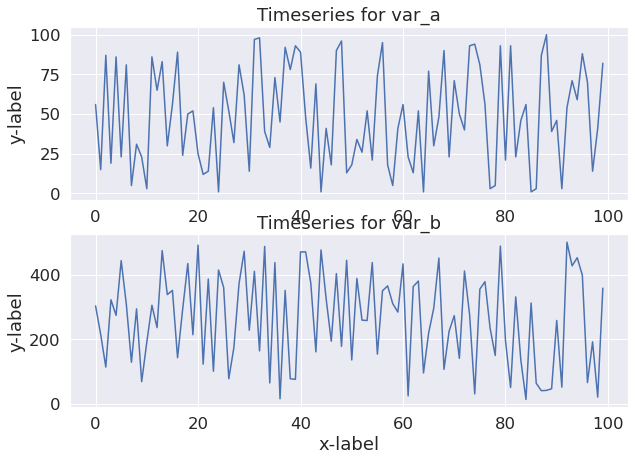

In [69]:
#plot sample year before fire
plt.figure(figsize=(20,15))
fig1,axs= plt.subplots(2, 1, figsize=(10,7))
fig1.subplots_adjust(wspace=10)
#fig1.suptitle('Year 1998')

axs[0].plot(var_a)
axs[0].set_title('Timeseries for var_a')
#axs[0].set_xlabel('x-label')
axs[0].set_ylabel('y-label')

axs[1].plot(var_b)
axs[1].set_title('Timeseries for var_b')
axs[1].set_xlabel('x-label')
axs[1].set_ylabel('y-label')

### Fit a linear regression model to the data

In [70]:
n = var_a.size;
B1 = (n* np.sum(var_a*var_b) - np.sum(var_a)*np.sum(var_b))/(n*np.sum(var_b**2) - (np.sum(var_b))**2);
B0 = np.mean(var_a) - B1*np.mean(var_b);
x = np.linspace(np.min(var_b), np.max(var_b),n)
y = B0 + B1*x
print('B1 is')
print(B1)
print('B0 is')
print(B0)


B1 is
0.0018623903667467508
B0 is
48.36721150895881


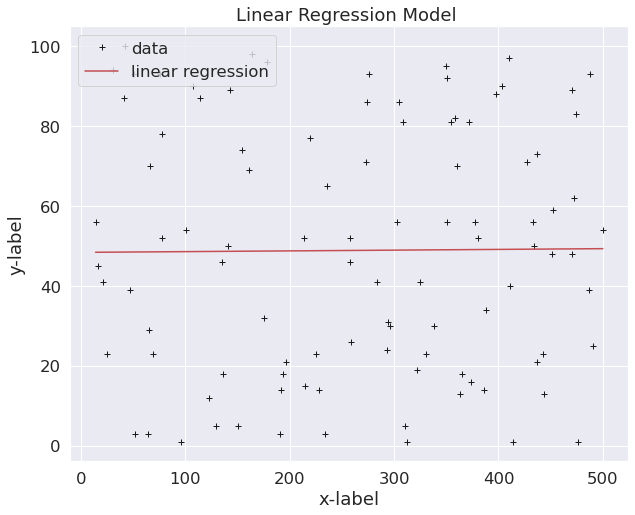

In [71]:
# plot 
plt.figure(figsize=(10,8))
plt.plot(var_b,var_a,'k+',label='data')
#label
plt.ylabel('y-label');
plt.xlabel('x-label')
plt.plot(x,y,'r-',label='linear regression');
plt.title('Linear Regression Model ')

# configure legend
plt.legend(loc='upper left')


### Check correlation

In [72]:
#Calc residuals of lin reg
r1p = var_a - (B0+B1*(var_b))

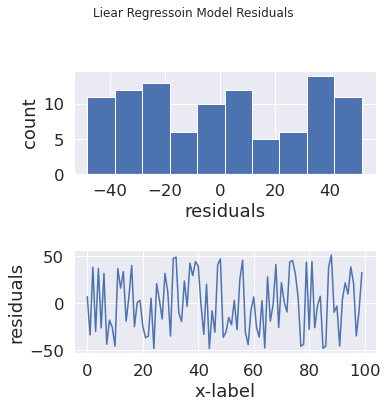

In [73]:
# Check that residuals are normally distributed
f, (ax1, ax2) = plt.subplots(2,1,figsize=(6,6))
f.suptitle('Liear Regressoin Model Residuals')
ax1.hist(r1p)
ax1.set_xlabel('residuals')
ax1.set_ylabel('count')
ax2.plot(r1p)
ax2.set_xlabel('x-label')

ax2.set_ylabel('residuals')
f.tight_layout(pad=3.0)

In [74]:
# Check Correlation Coefficient
R, P = st.pearsonr(var_b, var_a)
print('R = ', R)
print('R squared = ' , R*R)
print('P = ' , P)

R =  0.008722113401730739
R squared =  7.607526219265097e-05
P =  0.931366116439212


In [75]:
# create series of new test x-values to predict for
p_x1p = np.arange(np.min(x),np.max(x)+1,1)

# Calculate confidence intervals for new test x-series
mean_x1p = np.mean(x) 
n1p = x.size 
t1p = st.t.ppf(0.975, n1p-2) 
sse1p = np.sum(r1p**2) 
st_err1p = np.sqrt(sse1p/(n1p-2)) 
sigma1p = st_err1p**2 * (1 + 1/n1p + ( ( n1p*(p_x1p-mean_x1p)**2 ) / ( n1p*np.sum(x**2) - np.sum(x)**2 ) ) )
confs1p = t1p * np.sqrt(sigma1p)

### Plot confidence intervals

In [76]:
# Predict y based on test x-values
p_y1p = B1*p_x1p+B0

# Get lower and upper confidence limits based on predicted y and confidence intervals
lower1p = p_y1p - np.abs(confs1p)
upper1p = p_y1p + np.abs(confs1p)

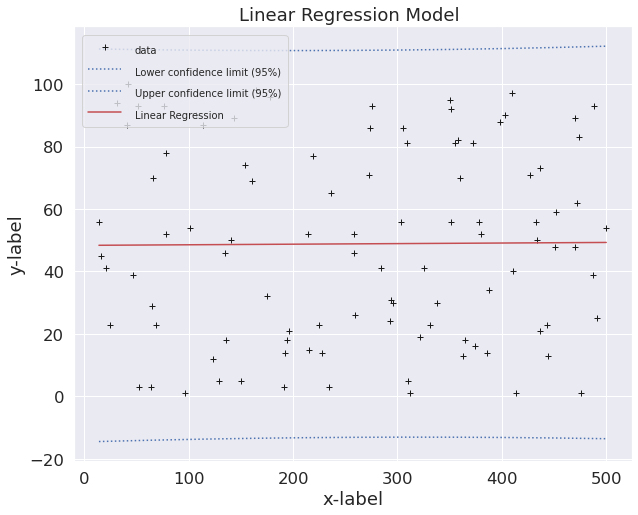

In [77]:
# plot 
plt.figure(figsize=(10,8))

plt.plot(var_b,var_a, 'k+',label='data');

# plot confidence limits
plt.plot(p_x1p,lower1p,':b',label='Lower confidence limit (95%)')
plt.plot(p_x1p,upper1p,':b',label='Upper confidence limit (95%)')

#label
plt.ylabel('y-label');
plt.xlabel('x-label')
plt.plot(x,y,'r-',label='Linear Regression');
plt.title('Linear Regression Model ')

# configure legend
plt.legend(loc='upper left')
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=10);

## Finding prediction Power of COVID-19  Cases for deaths

Philip

### A Machine Learning Example

<img src  = "ML_fig.gif">

Here we load two time series arrays - deaths and confirmed cases.  
We calculate the Pearson Coefficient between them as we shift Cases forward by days, to determine the predictive range of Cases for Deaths.

In [78]:
import datetime
from os.path import dirname, join
import os
import numpy as np
import pandas as pd
import pdb

import matplotlib.pyplot as plt
from matplotlib.dates import (DAILY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)

### Download the COVID-9 Data from JHU Repository

### Load the Cases and Deaths csv files into Panda Data Frames

In [83]:
# Load the panda dataframes
df_cc = pd.read_csv('tricountydailycases.csv') 
df_d = pd.read_csv('tricountydailydeaths.csv') 
#list(df_d.columns)tricountydailycases
df_d.head()

,date,deaths
0,2020-02-01,0.0
1,2020-02-02,0.0
2,2020-02-03,0.0
3,2020-02-04,0.0
4,2020-02-05,0.0


In [86]:
# Quick Plot of cases and deaths
mystate = 'Massachusetts'
# tick every 7 day
rule = rrulewrapper(DAILY, interval=30)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m/%d/%y')
dates = pd.to_datetime(df_d.date, format='%Y-%m-%d')
y = df_d[mystate]

KeyError: 'Massachusetts'

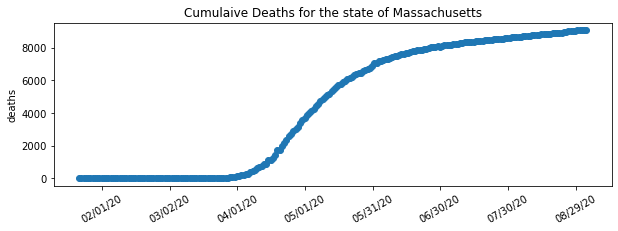

In [6]:
fig, ax = plt.subplots(figsize=(10,3))
plt.plot_date(dates, y, label='Cumulative Deaths')
ax.set_ylabel('deaths')
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
plt.title('Cumulaive Deaths for the state of ' + mystate)
plt.show()

In [7]:
# We want to predict the daily death count based on daily covis-19 case counts 
state = 'Massachusetts'
s_cc = df_cc[state].diff()
s_cc[s_cc < 0] = 0
s_d = df_d[state].diff()
s_d[s_d < 0] = 0
s_d= s_d.fillna(0)
s_d

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
221    13.0
222    11.0
223     4.0
224     0.0
225    17.0
Name: Massachusetts, Length: 226, dtype: float64

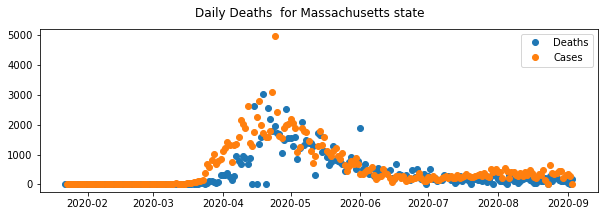

In [8]:
fig= plt.figure(figsize=(10,3))
fig.suptitle('Daily Deaths  for ' + state + ' state')
plt.plot_date(dates, s_d * 10, label = 'Deaths')  # multiple deaths by 10 for visual clarity
plt.plot_date(dates, s_cc, label= 'Cases')
plt.legend()
plt.show()

### Create a graph of value of Pearson Co-efficient as a function of shift in Cases
This is to find how many days forward does Cases best predict Deaths

In [9]:

ar_offset = []
ar_psn_r =[]
best_doffset = 0 # assume in synch
psn_best = -1    # assume pefectly inverted 
for doffset in range(30):
    ar_offset.append(doffset) 
    s_cc_o = s_cc.shift(periods = doffset, fill_value=0)  # shift Cases forward by doffset days, putting 0's in new slots
    psn_r = s_d.corr(s_cc_o) # Calculate Pearson corelation
    if psn_r > psn_best:
        psn_best = psn_r
        best_doffset = doffset
    ar_psn_r.append(psn_r) 
    #print('With ', doffset, ' day shift', psn_r)
dates = pd.to_datetime(df_cc.date, format='%Y%m%d')
predict = pd.DataFrame()
predict["Day Offset"] = ar_offset
predict["Pearson r"] = ar_psn_r
predict.head()
str_rsnbest = "{:5.2f}".format(psn_best)
str_title = f'Pearsons r vs offset to Cases for the state of {state} (max of {str_rsnbest} at {best_doffset} day offset)'
print (f'Highest Pearson Correlation value of {str_rsnbest} occurs when Cases shifted forward {best_doffset} days')

Highest Pearson Correlation value of  0.82 occurs when Cases shifted forward 7 days


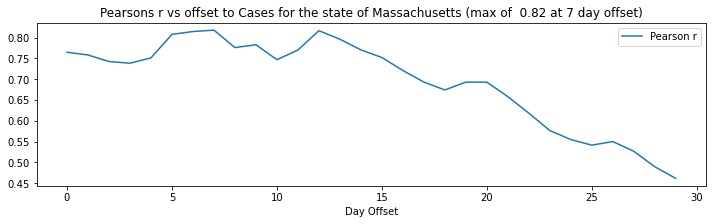

In [10]:
predict.plot(kind='line', x='Day Offset',    y='Pearson r', figsize=(12,3), title = str_title )
plt.show()